### Problem Statement


- To train machine learning model with the given features and accurately predict.


#### Type of Problem 
- Product Price - We use linear regression and random forest to predict what the price of the product will be.


#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

#### Loading and Understanding the Dataset

In [2]:
gold_price = pd.read_csv('gld_price_data.csv')

Viewing the first 5 and last 5 rows of the dataset tells us that we are given the data for a period of nearly one decade. There are a total of 2290 entries.

In [3]:
gold_price.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_price.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


There are 6 columns in total:
- Date denotes the date in mm/dd/yyyy format.
- SPX is the capitalization index of 500 companies which are publicly traded whcih means it is the spx stock value for these corresponding dates.
- GLD represents gold prices for these corresponding dates which we wish to predict.
- USO represents United States Oil Price for these corresponding dates.
- SLV is the Silver Price Value for these corresponding dates.
- EUR/USD currency pair ie Euro/ Dollar pair.


In [5]:
gold_price.shape

(2290, 6)

#### To get basic information about data - data types of columns,missing value, statistical measures.

Data types of columns
- We are dealing with numeric data.

In [6]:
gold_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


The dataset is free from missing values.

In [7]:
gold_price.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Statistical measures of the data.

- We can see the price of gold to vary in the range 70.000000 to 184.589996.
- The mean of the gold price is 122.732875.

In [8]:
gold_price.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


#### Correlation 
There are two types of Correlation:
- Postive - as one variable increases/ decreases the other also increase/descreases. Direct Relationship
- Negative - as one variable increase/ decreases the other decreases/ increases. Inverse relationship.

In [9]:
corr = gold_price.corr()

Using Heatmap we can check the correlation of GLD with other features and conclude the following:
- SLV and GLD are positive correlated with score of 0.87

Text(0.5, 1, 'Correlation of Features')

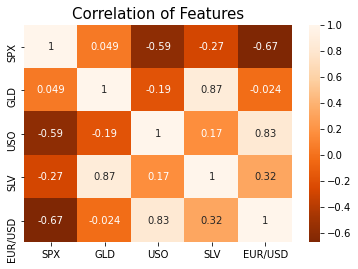

In [10]:
sns.heatmap(gold_price.corr(),annot = True,cmap='Oranges_r')
plt.title('Correlation of Features', y = 1, size=15)

- GLD is positively correlated with SLV and SPX. It is strongly correlated with SLV and extremely less correlated with SPX.
- Whereas, it is negatively correlated with EUR/USD and USO.


In [11]:
print(corr['GLD'].sort_values(ascending=False), '\n')

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 



Let us see how the Gold Price is distributed

<AxesSubplot:xlabel='GLD', ylabel='Density'>

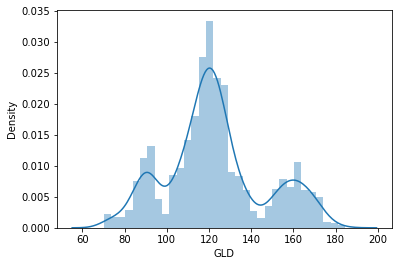

In [12]:
sns.distplot(gold_price['GLD'])

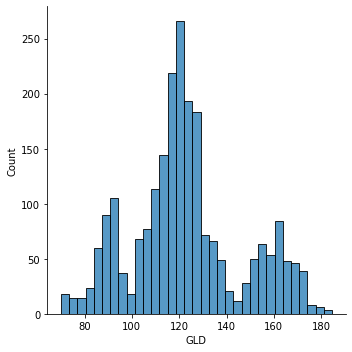

In [13]:
sns.displot(gold_price['GLD'])

Skewness is the degree of asymmetry in the distribution.
Positive skewness exhibits right skewness.

In [14]:
print(gold_price['GLD'].skew())

0.33413834726925085


Kurtosis is the 4th central moment.
It provides information about the peakedness(the degree to which the data is concentrated around the mean) of the data distribution.

A negative kurtosis indicates a more disperse distribution than normal distribtution.

In [15]:
print(gold_price['GLD'].kurtosis())

-0.2750805233458311


#### Effect on Gold Prices

Here we select the features with which GLD is positively correlated.
- Clearly, we can analyse the trend between SLV and GLD is correlated.
- Whereas, the stock price has fluctuated over the years with a slight effect on the Gold Price.

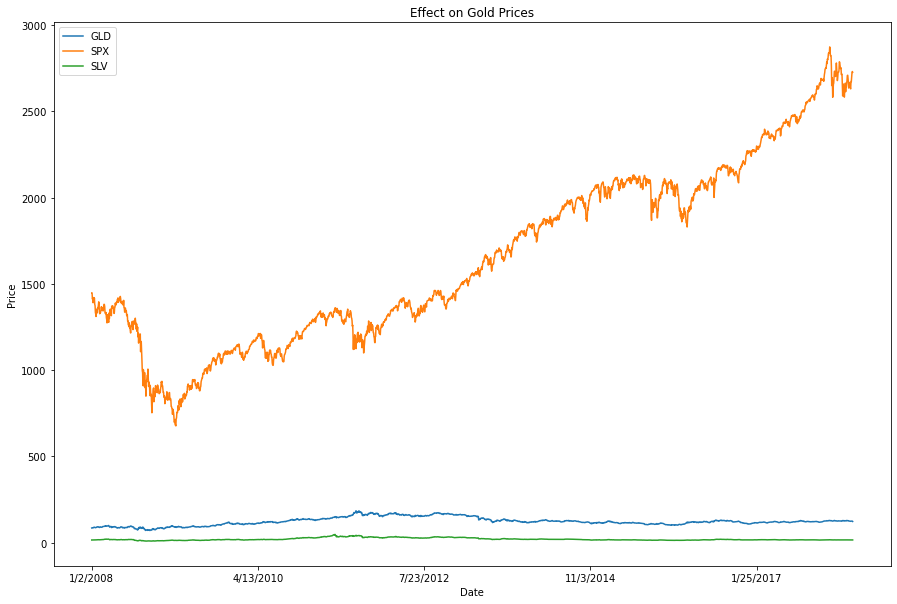

In [16]:
gold_df = pd.DataFrame({'GLD': gold_price['GLD'], 'SPX': gold_price['SPX'], 'SLV': gold_price['SLV'], 'Date':gold_price['Date']}).set_index('Date')
gold_df_ax = gold_df.plot(title = 'Effect on Gold Prices',figsize = (15,10))
gold_df_ax.set_ylabel('Price')
gold_df_ax.legend(loc = 'upper left')
plt.show()


Here we select the features with which GLD is negatively correlated.
- EUR/USD does not effect the Gold Price to a great extent. 
- USO affects the Gold Price inversely as seen below. When USO goes up around, the Gold Price is seen to drop in most time intervals. 


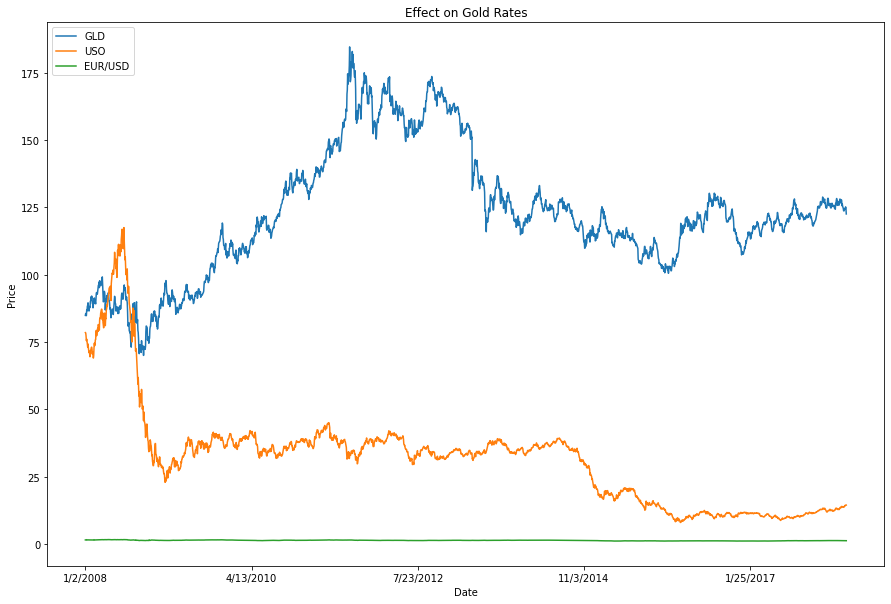

In [17]:
gold_df1 = pd.DataFrame({'GLD': gold_price['GLD'], 'USO': gold_price['USO'], 'EUR/USD': gold_price['EUR/USD'], 'Date':gold_price['Date']}).set_index('Date')
gold_df1_ax = gold_df1.plot(title = 'Effect on Gold Rates',figsize = (15,10))
gold_df1_ax.set_ylabel('Price')
gold_df1_ax.legend(loc = 'upper left')
plt.show()

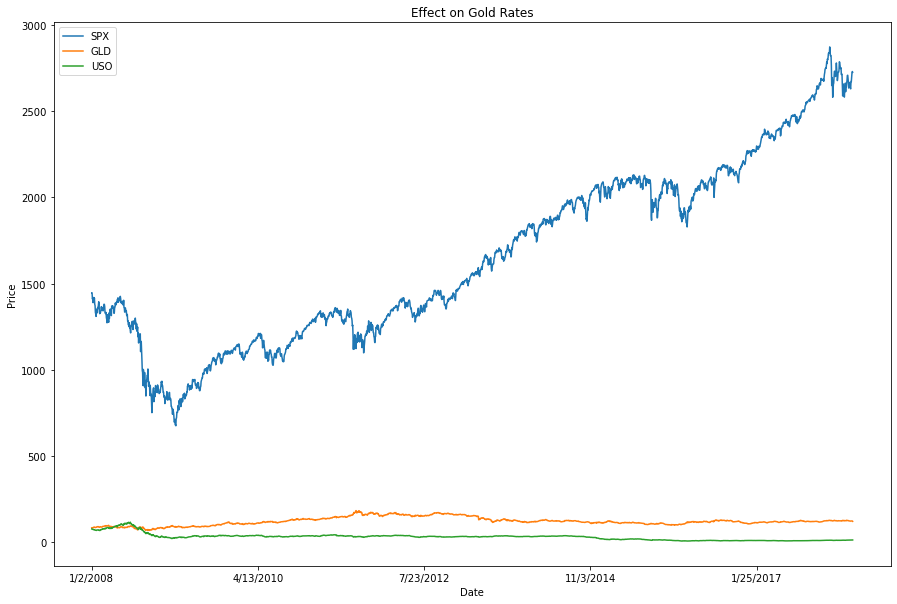

In [18]:
gold_sliced = gold_price.iloc[:,:4].set_index('Date')
gold_ax = gold_sliced.plot(title = 'Effect on Gold Rates',figsize = (15,10))
gold_ax.set_ylabel('Price')
gold_ax.legend(loc = 'upper left')
plt.show()

####  Splitting Features and Target & Train Test Split

- X represents the features
- Y represents the target

In [19]:
X = gold_price[['SPX','SLV','USO','EUR/USD']]
Y = gold_price['GLD']

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

#### Modelling 

 ##### - Using Linear Regression

In [21]:
model1 = LinearRegression()

In [22]:
model1.fit(X_train,Y_train)

LinearRegression()

#### Evaluation

In [23]:
model1.score(X_train,Y_train)

0.8850695972446934

Something seems amiss!

In [24]:
model1.score(X_test,Y_test)

0.8657886565869237

In [25]:
Y_pred = model1.predict(X_test)

In [26]:
metrics.r2_score(Y_test, Y_pred)

0.8657886565869237

Ooops! The error is too high.

In [27]:
print('MAE :'," ", metrics.mean_absolute_error(Y_test,Y_pred))
print('MSE :'," ", metrics.mean_squared_error(Y_test,Y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

MAE :   5.91148673577776
MSE :   70.7889007972153
RMAE :   8.413614015226472


#### Visualize the prediction vs actual data

- We plot the predicted values over the actual ones. The values are not close enough.

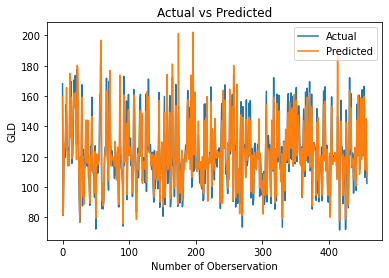

In [28]:
Y_test = list(Y_test)
plt.plot(Y_test,label = 'Actual')
plt.plot(Y_pred,label = 'Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Number of Oberservation')
plt.ylabel('GLD')
plt.legend()
plt.show()


The linear regression model did not work well.

##### - Using Random Forest Regressor

In [29]:
model2 = RandomForestRegressor(n_estimators = 100)

In [30]:
model2.fit(X_train,Y_train)

RandomForestRegressor()

#### Evaluation

In [31]:
model2.score(X_train,Y_train)

0.9983737636593594

In [32]:
Y2_pred = model2.predict(X_test)

In [33]:
metrics.r2_score(Y2_pred,Y_test)

0.9896279140872518

Phew! Along with the training and testing score the MAE, MSE & RMAE scores are pretty good. We are good to go!

In [34]:
print('MAE :'," ", metrics.mean_absolute_error(Y_test,Y2_pred))
print('MSE :'," ", metrics.mean_squared_error(Y_test,Y2_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(Y_test,Y2_pred)))

MAE :   1.326825334912657
MSE :   5.439222894423855
RMAE :   2.332214161354796


#### Visualize the prediction vs actual data

- We plot the predicted values over the actual ones. The values are really close.

In [35]:
Y_test = list(Y_test)

In [ ]:
plt.plot(Y_test,label = 'Actual')
plt.plot(Y2_pred,label = 'Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Number of Oberservation')
plt.ylabel('GLD')
plt.legend()
plt.show()


#### We clearly have a winner and that is Random Forest Regressor!